In [1]:
#Import pacakges
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Load cleaned_dark_chocolate_bar_ratings data into data frame
df_r = pd.read_csv('cleaned_dark_chocolate_bar_ratings.csv')
df_rating = df_r[['bean_country', 'cocoa_percent', 'total_ingredients','ingredient_combination','rating']].copy()
#df_rating.info()

#Load individual_characteristics data into data frame
df_c = pd.read_csv('individual_characteristics.csv')
df_char = df_c[['characteristic','rating']].copy()
#df_char.info()

# Subset to Analyze

Because the project is to determine what variables and values contribute to high-quality rated dark chocolate bars, the focus of this analysis will be on chocolate bars with a rating of 3.5 and above.

In [3]:
#Create data frame with only ratings 3.5 and above
df_quality = df_rating.drop(df_rating[df_rating['rating'] < 3.5].index).copy()

#Reset Index
df_quality.index = range(len(df_quality.index))
#df_quality.info()

#Create data frame with only ratings 3.5 and above
df_char_quality = df_char.drop(df_char[df_char['rating'] < 3.5].index).copy()

#Reset Index
df_char_quality.index = range(len(df_char_quality.index))
#df_char_quality.info()

<AxesSubplot:>

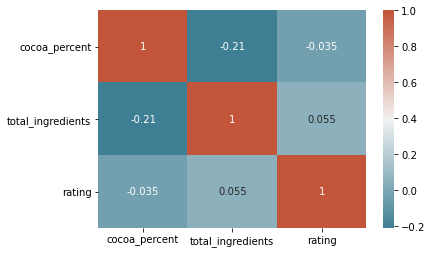

In [4]:
#Plot correlation matrix
corr =  df_quality.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

None of the quantitative variables correlated with ‘rating’ greater than 0.01.
* Total Ingredients' correlation: 0.055
* Cocoa Percent correlation: -0.035

In [5]:
#Functions
#Create bar plot
def plot_bar(x, df, var):
    #Create dataframe from value coutns
    df_top = df[x].value_counts().reset_index().rename(columns={'index': 'name'})

    #Update dataframe to only hace top ten value sorted by varibles
    df_top = df_top.head(10).sort_values(by='name')

    #Reset Index
    df_top.index = range(len(df_top.index))

    #Plot top values
    plt.figure(figsize=(12,4))
    ax = sns.barplot(x='name', y=x, data=df_top, color='lightblue')
    for p in ax.patches:
        height = int(p.get_height())
        ax.text(p.get_x()+p.get_width()/2., height + 0.8,height ,ha="center")
    plt.xlabel('{var}'.format(var=var))
    plt.ylabel('Count')
    plt.title('Distribution of Top 10 {var}'.format(var=var))
    plt.show()

    
#Create bar plot grouped by target ratings   
def plot_grouped_bar(x, df, var):
    ax = sns.catplot(x=x, hue="rating", kind='count',data=df, height = 5, aspect=2, 
                     palette= 'hot_r',order=pd.value_counts(df[x]).iloc[:10].index) 
    ax._legend.set_title('Rating')
    plt.xlabel('{var}'.format(var=var))
    plt.ylabel('Count')
    plt.title('Distribution of Top 10 {var} by Ratings'.format(var=var))
    plt.show()
    return ax

# Exploratory Data Analysis
The purpose of this project is to determine what variables and values of a dark chocolate bar lead to a high-quality rating (rating >= 3.5). This will improve the decision-making process for product development at Mershers by transforming data relevant to the product into useful and insightful information. 

Because the focus is to assist the decision-making process. I decided to analyze and interpret my results in the form of recommendations based on the insights produced. 
The exploratory analysis will proceed as followed:

I will examine the top 10 values for each variable that was determined statistically significnate. This is to isolate what values of a variable are the most impactful and most likely to provided better insight. The analysis will start by performing a univariate analysis using bar plots to explore the distribution of a variable. Then, I will perform a bivariate analysis on each explanatory variable to the dependent variable (rating) through grouped bar plots and box plots. Under each plot, I will write my interpretation of the plot.


## Analysis of 'cocoa_percent'
*** 
### Univariate Analysis

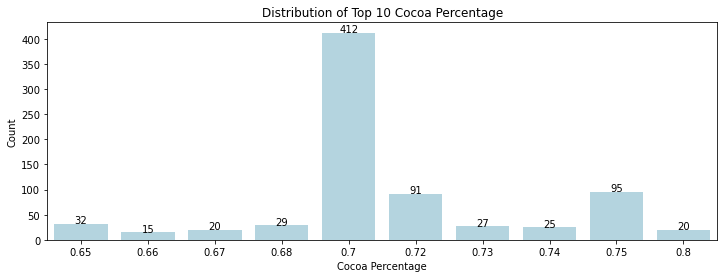

In [6]:
plot_bar('cocoa_percent', df_quality, 'Cocoa Percentage');

The most common values for the variable 'cocoa percentage' are 0.7, 0.75, 0.72.
1.	0.7 had the highest frequency of 412.
2.	0.75 with a frequency of 95.
3.	0.72 with a frequency of 91.

There are an overwhelming amount of choclate bar with a high-quality rating with 70% cocoa percentage. 

## Bivariate Analysis with 'rating'

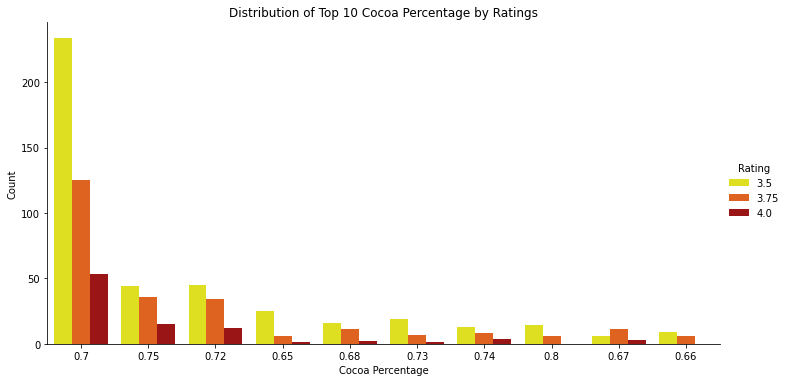

count    876.000000
mean       0.711073
std        0.042047
min        0.500000
25%        0.700000
50%        0.700000
75%        0.730000
max        1.000000
Name: cocoa_percent, dtype: float64

In [7]:
plot_grouped_bar('cocoa_percent', df_quality, 'Cocoa Percentage');
df_quality['cocoa_percent'].describe()

For values with a high-quality rating, most chocolate bars had a cocoa percentage between 0.7 and 0.73, with a mean of 0.71. The distribution follows a similar pattern where a majority has a rating of 3.5 then 3.75 and 4.0.

# Analysis of 'total_ingredients'
*** 
## Univariate Analysis

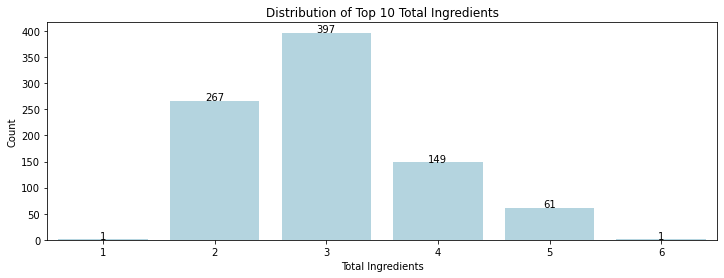

In [8]:
plot_bar('total_ingredients', df_quality, 'Total Ingredients');

The most common values for the variable 'total ingredients' are 3, 2, 4.
1.	3 highest frequency of 397.
2.	2 with a frequency of 267.
3.	4 with a frequency of 149.

The values 1 and 6 only one chocolate bar with a high-quality rating. 

## Bivariate Analysis with 'rating'

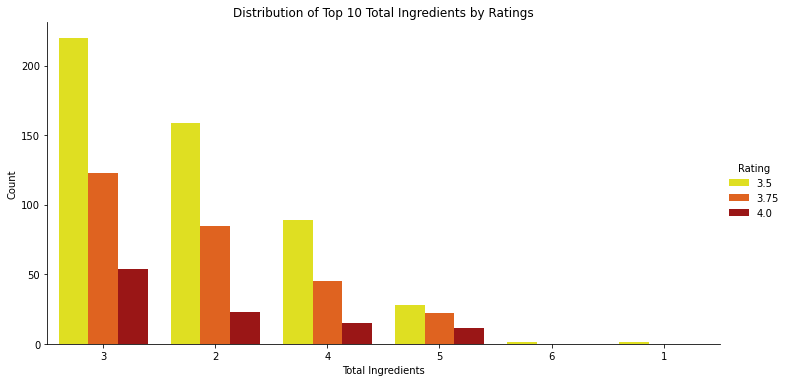

count    876.000000
mean       3.005708
std        0.876989
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        6.000000
Name: total_ingredients, dtype: float64

In [9]:
plot_grouped_bar('total_ingredients', df_quality, 'Total Ingredients');
df_quality['total_ingredients'].describe()

For values with a high-quality rating, most chocolate bars had a total of ingredients between 2.0 and 3.0, with a mean of 3.01. The distribution follows a similar pattern where a majority has a rating of 3.5 then 3.75 and 4.0. The values 6 and 1 only have ratings of 3.5.

# Analysis of 'ingredient_combination'
*** 

## Univariate Analysis

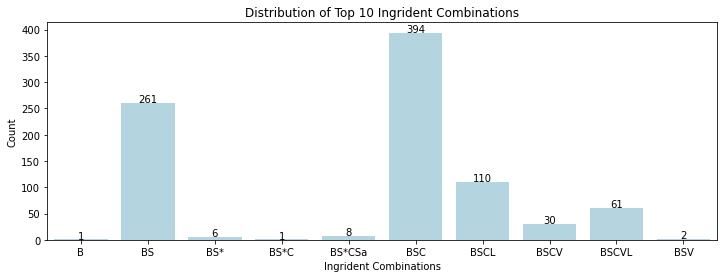

In [10]:
plot_bar('ingredient_combination', df_quality, 'Ingrident Combinations');

The most common values for the variable 'ingrident combinations' are 'BSC', 'BS', 'BSCL'. 
1.	BSC had the highest frequency of 394.
2.	BS with a frequency of 261.
3.	BSCL with a frequency of 110.

There is a significant drop in frequency after the third most frequent value 'BSCL'. The next is 'BSCVL' with a frequency of 61.

## Bivariate Analysis with 'rating'

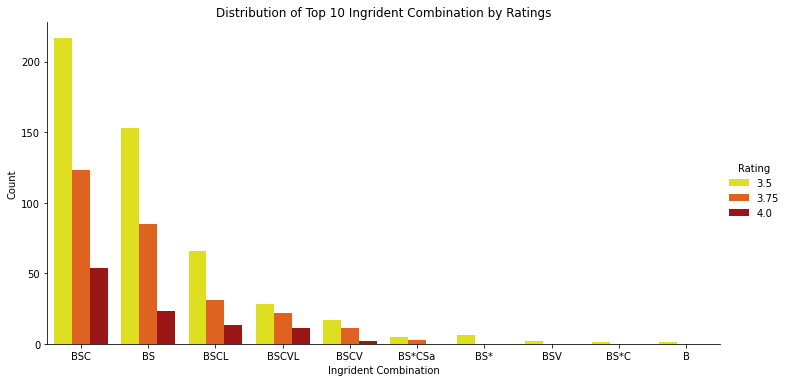

count     876
unique     12
top       BSC
freq      394
Name: ingredient_combination, dtype: object

In [11]:
plot_grouped_bar('ingredient_combination', df_quality, 'Ingrident Combination');
df_quality['ingredient_combination'].describe()

For values with a high-quality rating, the most common value for ingredient combination was BSC with a frequency of 394. The distribution follows a similar pattern where a majority has a rating of 3.5 then 3.75 and 4.0.

# Analysis of 'memorable_characteristics'
*** 

## Univariate Analysis

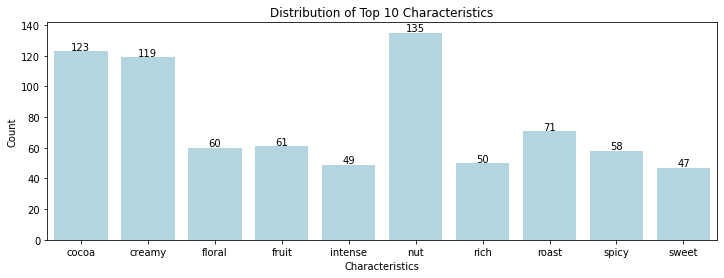

In [12]:
plot_bar('characteristic', df_char_quality, 'Characteristics');

The most common values for the variable 'characteristic' are 'nut', 'cocoa', 'creamy'. 
1. Nut had the highest frequency of 135.
2. Cocoa with a frequency of 123.
3. Creamy with a frequency of 119.

There is a significant drop in frequency after the third most frequent value 'creamy'. The next is 'roast' with a frequency of 71.

## Bivariate Analysis with 'rating'

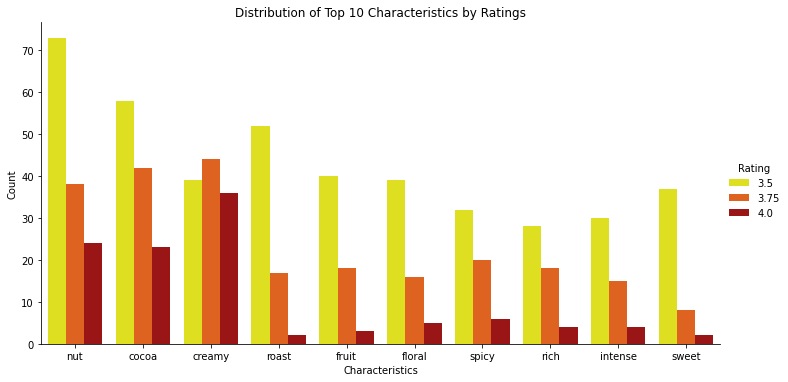

count     2411
unique     422
top        nut
freq       135
Name: characteristic, dtype: object

In [13]:
#Explore 'characteristic' with target rating
plot_grouped_bar('characteristic', df_char_quality, 'Characteristics');
df_char_quality['characteristic'].describe()

For values with a high-quality rating, the most common value for characteristics was 'nut' with a frequency of 135. The distribution follows a similar pattern where a majority has a rating of 3.5 then 3.75 and 4.0.

Interestingly, the characteristic 'creamy' has more ratings with 3.75 and 4.0. If the product development wanted to focus on ratings higher than 3.5 it would be best to focus on 'creamy' rather than 'nut'.

# Conclusion

Based on the insights gathered, the recommendation for product developers should place a greater focus on the percentage of cocoa, the total ingredients used, the combination of ingredients, and the memorable characteristics of a dark chocolate bar. The most frequent cocoa percentage for high-quality rating is 0.7.  The most frequent total ingredient for a high-quality rating is 3.  The most frequent ingredient combination for a high-quality rating is BSC.  The most frequent memorable characteristic for a high-quality rating is 'nut'.